In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [4]:
df = df.drop(columns = ['availability','society','balcony','area_type'])

In [5]:
df = df.dropna()

In [6]:
df['location'].value_counts()
df['size'].value_counts()


2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [7]:
df['bhk'] = df['size'].apply(lambda x : x.split(" ")).str.get(0).astype(int)

In [8]:
df['bhk'].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bhk, dtype: int64

In [9]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [10]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [11]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [12]:
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)
df = df[df.total_sqft.notnull()]

In [13]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [14]:
df['location'] = df['location'].apply(lambda x : x.strip())
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [15]:
location_stats_less_than_10 = location_stats[location_stats<10]
location_stats_less_than_10

location
Kaverappa Layout         9
B Narayanapura           9
2nd Phase JP Nagar       9
Banagiri Nagar           9
Chandra Layout           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Kannur                   1
whitefiled               1
Name: location, Length: 1033, dtype: int64

In [16]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [17]:
 df['location'].value_counts()

other                   2732
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
                        ... 
Nagappa Reddy Layout      10
BTM 1st Stage             10
Basapura                  10
Sector 1 HSR Layout       10
Nagadevanahalli           10
Name: location, Length: 255, dtype: int64

Removing Outliers

In [18]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [19]:
df2 = (df['total_sqft']/df['bhk'] < 300)
df = df[~df2]
df.shape

(12456, 7)

In [20]:
df['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [21]:
df['z_score_for_price_per_sqft'] = (df['price_per_sqft'] - np.mean(df['price_per_sqft']))/np.std(df['price_per_sqft'])

C:\Users\avina\AppData\Local\Temp\ipykernel_4968\239457218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_score_for_price_per_sqft'] = (df['price_per_sqft'] - np.mean(df['price_per_sqft']))/np.std(df['price_per_sqft'])


In [22]:
df = df [(df['z_score_for_price_per_sqft'] > -2) & (df['z_score_for_price_per_sqft'] < 2)]

In [23]:
df.shape

(11968, 8)

<AxesSubplot: xlabel='price_per_sqft', ylabel='Count'>

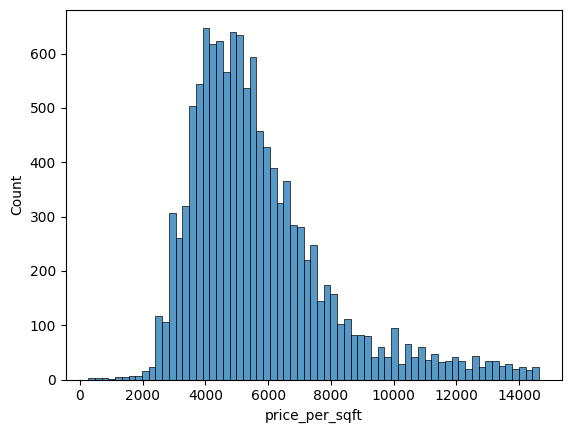

In [24]:
 sns.histplot(data = df , x = 'price_per_sqft')

In [25]:
df['bath'].value_counts()
df[df['bath'] > df['bhk']]

df = df[~(df['bath'] > df['bhk'])]
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score_for_price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,-0.625892
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,-0.480558
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,-0.015022
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,-0.493887
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248,-0.734326
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.612245,0.053290
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926,0.091491
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136,-0.251912
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319,0.983415


In [26]:
 dummies = pd.get_dummies(df['location'])
dummies = dummies.drop('other',axis = 'columns')
dummies

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df = pd.concat([df,dummies],axis = 'columns')

In [28]:
df.isnull().sum()

location              0
size                  0
total_sqft            0
bath                  0
price                 0
                     ..
Yelachenahalli        0
Yelahanka             0
Yelahanka New Town    0
Yelenahalli           0
Yeshwanthpur          0
Length: 262, dtype: int64

In [29]:
df = df.drop('location',axis = 'columns')

In [30]:
df

,size,total_sqft,bath,price,bhk,price_per_sqft,z_score_for_price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2 BHK,1056.0,2.0,39.07,2,3699.810606,-0.625892,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3 BHK,1440.0,2.0,62.00,3,4305.555556,-0.480558,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 BHK,1521.0,3.0,95.00,3,6245.890861,-0.015022,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2 BHK,1200.0,2.0,51.00,2,4250.000000,-0.493887,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2 BHK,1170.0,2.0,38.00,2,3247.863248,-0.734326,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,3 BHK,1715.0,3.0,112.00,3,6530.612245,0.053290,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,5 Bedroom,3453.0,4.0,231.00,5,6689.834926,0.091491,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13317,2 BHK,1141.0,2.0,60.00,2,5258.545136,-0.251912,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4 BHK,4689.0,4.0,488.00,4,10407.336319,0.983415,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X = df.drop(columns =[ 'price','z_score_for_price_per_sqft','size'],)
y = df['price']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [33]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.5454027562266747

In [34]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [35]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
cross_val_score(DecisionTreeRegressor(),X,y,cv = cv)

array([0.98782789, 0.97636875, 0.98404679, 0.98948337, 0.98563485,
       0.97662965, 0.69956214, 0.9835373 , 0.98775824, 0.94826603])

In [36]:
def predict_price(location,total_sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    
    return dt.predict([x])[0]

In [37]:
predict_price('Whitefield',1170,6,2)


C:\Users\avina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


14.0

In [38]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(dt,f)
